## Overview

This notebook set deals with fish toxicity (how toxic particular molecules are to the flathead minnow).  It is from [here](https://archive.ics.uci.edu/dataset/504/qsar+fish+toxicity).

The goal is to provide familiarity and practice with notation, datasets, and plotting.

In [1]:
## These are the only libraries you should need
import numpy as np
import matplotlib.pyplot as plt

# below line just to make figures larger
plt.rcParams["figure.figsize"] = (20,10)

### Dataset
The dataset consists of 6 features for 726 molecules (the training set) and the same features for another 182 molecules (the testing set).  The y-value (to be predicted) is a measure of how toxic the molecule is to a fish (the flathead minnow).

The code below loads in both a training dataset (`train`) and a testing dataset (`test`).  Most importantly, each as a `.X` and `.Y` field: numpy arrays of the $X$ and $Y$ matrices.  You can also find the names of each feature(`.featnames`) and the name of the y values (`.yname`).

For example, `train.X` is the feature matrix for the training set and `train.featnames[0]` is the name (a string) of the first feature.

In [2]:
import sys; sys.path.insert(0, '../..') # path to dataset.py (adjust if you have moved this file or dataset.py)
from dataset import loaddataset

#adjust the directory below if you have moved either the dataset files or this notebook
datasetdir = '../../datasets/' 

train = loaddataset(datasetdir+'fishtoxic-train')
test = loaddataset(datasetdir+'fishtoxic-test')

## Question 1:

<div style="color: #000000;background-color: #FFFFEE">
In the cell below, write code that generates a <b>pair plot</b>.  While there are libaries that do this automatically, to gain experience with using datasets and plotting, generate the pair plot using only numpy and matplotlib as libraries.

A pair plot is a grid of plots.  Each row corresponds to a different feature.  Each column also corresponds to a different feature.  *In this case, we will also include the $y$ values as a row and column.*  For this plot, order the target (y value) as the last "feature."

Thus, the plot in grid position 1-2 is a plot involving feature 1 and feature 2.  Grid position 2-5 involves feature 2 and feature 5.  Grid position 0-6 involves the feature 0 and the target (y value).  Each individual plot is a scatter plot of the data with the row's feature along the vertical axis and the column's feature along the horizontal axis.

For this version of a pair plot, we can omit (not plot) the plots on the diagonal grid cells (because they would be the same vertical and horizontal features).  Further, because the i-j plot and the j-i plot contain the same information, we need only plot one.  Plot only the "lower triangular" elements of the grid.

Be sure to label the axes with the names of the corresponding feature (or y value).

Hints:
<ul>
    <li> <a href="https://matplotlib.org/stable/api/">This page</a> documents the different <tt>matplotlib</tt> routines.</li>
    <li> <tt>plt.subplots(...)</tt> will produce a set of axes in a grid.</li>
    <li> You might want to try the <tt>sharex</tt> and <tt>sharey</tt> parameters of <tt>subplots</tt> to make the grid more compact.</li>
    <li> You can remove a plot (for the "upper part" of the grid) by calling <tt>.remove()</tt> on the corresponding axes class.</li>
    <li> You only need to label the horizontal axes once per column and the vertical axes once per row.</li>
    <li> Plotting the point with an alpha value (of, say, 0.2) will help make the distribution more clear where the points overlap.</li>
    <li> While the full pair plot would be a grid 7-by-7 (because there are 6 features plus 1 y value), because we will omit the diagonals and upper triangle, you can fit the resulting plots into a 6-by-6 grid.</li>
</ul>
    
</div>

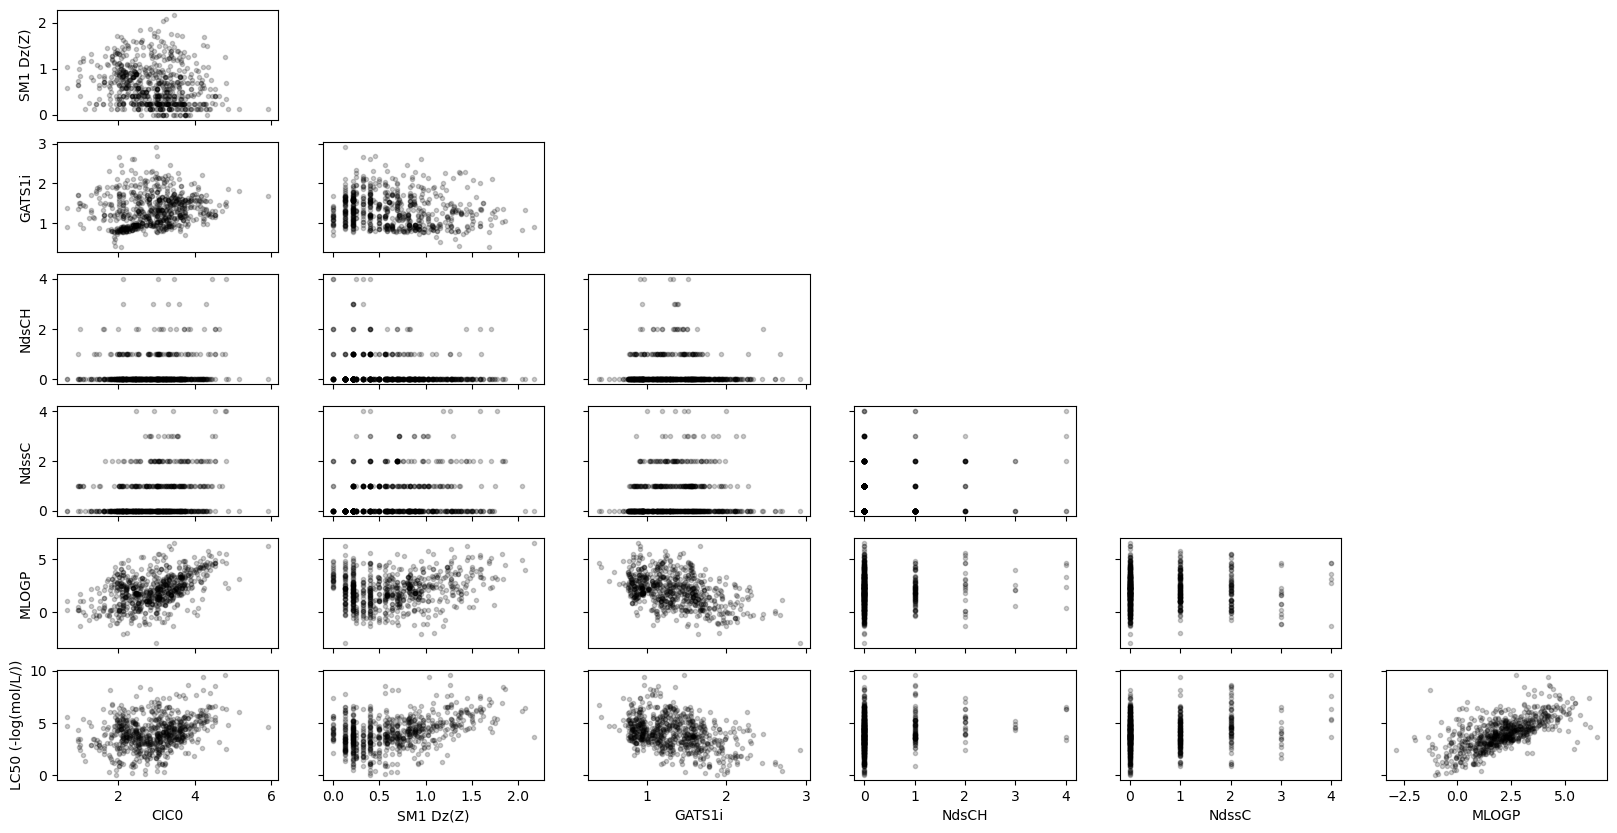

In [3]:
n = train.X.shape[1]
fig, axs = plt.subplots(n,n,squeeze=False,sharey='row',sharex='col')
for i,axrow in enumerate(axs):
    for j,ax in enumerate(axrow):
        if i<j:
            ax.remove()
        xvals = train.X[:,j] if j<n else train.Y
        yvals = train.X[:,i+1] if i<n-1 else train.Y
        ax.plot(xvals,yvals,'k.',alpha=0.2)
        if i==n-1:
            ax.set_xlabel(train.featnames[j] if j<n else train.yname)
        if j==0:
            ax.set_ylabel(train.featnames[i+1] if i<n-1 else train.yname)

## Question 2:

<div style="color: #000000;background-color: #FFFFEE">
    
<b>part a</b> What does the pair plot tell you about the features NdsCH and NdssC?
</div>    

These features are discrete, integer values.

<div style="color: #000000;background-color: #FFFFEE">
    
<b>part b</b> Which feature would be best on its own for predicting the target (LC50)?
</div>
    

MLOGP (the last feature) is well correlated with the target (MLOGP) and the best candidate single feature.

## Question 3:

<div style="color: #000000;background-color: #FFFFEE">
        
<b>part a.</b> Plot a scatter plot of the target (LC50) versus the feature you chose in part b, above.

By eye (no calculations) pick a line (slope and intercept) that you think best fits the relationship between these two variables.  Plot that line on the same scatter plot.  Label the line with its equation.
</div>

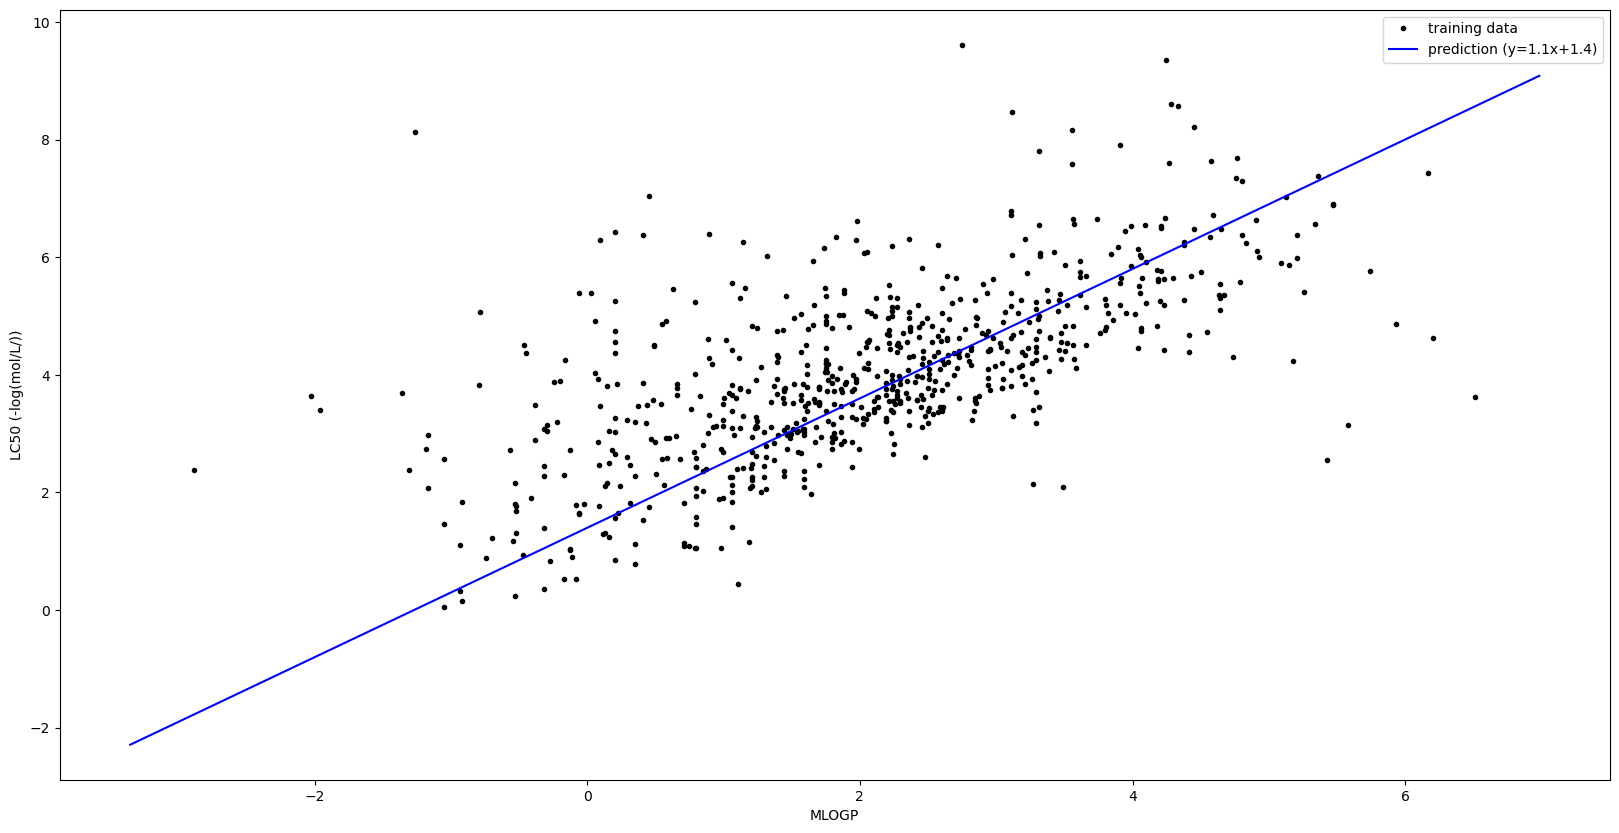

In [4]:
fig,ax = plt.subplots(1,1)
ax.plot(train.X[:,5],train.Y,'k.')
m = 1.1
b = 1.4
x0,x1 = ax.get_xlim()
ax.plot([x0,x1],[x0*m+b,x1*m+b],'b-')
ax.legend(['training data',f'prediction (y={m}x+{b})'])
ax.set_xlabel(train.featnames[5])
ax.set_ylabel(train.yname);

<div style="color: #000000;background-color: #FFFFEE">
<b>part b.</b> Using this line, predict the target values for the testing data.  Compare them to the true y values and calculate the average (mean) squared error.  Report this error.
</div>


In [5]:
testpred = test.X[:,5]*m+b
meansqerror = ((testpred-test.Y)**2).mean()
print(meansqerror)

1.3332547652197804
